<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Hypergeometric_Dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code demonstrates how Hypergeometric distribution pmf is calculated
ref. https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4

# I. Compute hypergeometric pmf and pdf manually

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, D, n, x):

    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param D: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Dchoosex = comb(D,x)
    NDchoosenx = comb(N-D, n-x)
    Nchoosen = comb(N,n)

    return (Dchoosex)*NDchoosenx/Nchoosen

In [ ]:
px0=hypergeom_pmf(100, 5,10,0)
px0

0.583752366926152

In [ ]:
px1=hypergeom_pmf(100, 5,10,1)
px1

0.3393909110035767

In [ ]:
px0+px1

0.9231432779297286

In [ ]:
# compute and print the pmf and cdf values
hgcdf=0
for x in range(11):
  hgpmf=hypergeom_pmf(100, 5,10,x)
  hgcdf=hgcdf+hgpmf
  print(x, "   ", hgpmf, "   ", hgcdf)

0     0.583752366926152     0.583752366926152
1     0.3393909110035767     0.9231432779297286
2     0.0702188091731538     0.9933620871028824
3     0.006383528106650345     0.9997456152095328
4     0.0002510376221716428     0.9999966528317044
5     3.347168295621904e-06     1.0
6     0.0     1.0
7     0.0     1.0
8     0.0     1.0
9     0.0     1.0
10     0.0     1.0


In [ ]:
def hypergeom_plot(N, D, n):

    '''
    Visualization of Hypergeometric Distribution for given parameters
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :returns: Plot of Hypergeometric Distribution for given parameters
    '''

    x = np.arange(0, n+1)
    y = [hypergeom_pmf(N, D, n, x) for x in range(n+1)]
    plt.plot(x, y, 'bo')
    plt.vlines(x, 0, y, lw=2)
    plt.xlabel('# of outcomes in the sample n')
    plt.ylabel('Probablities')
    plt.title('Hypergeometric Distribution Plot')
    plt.show()

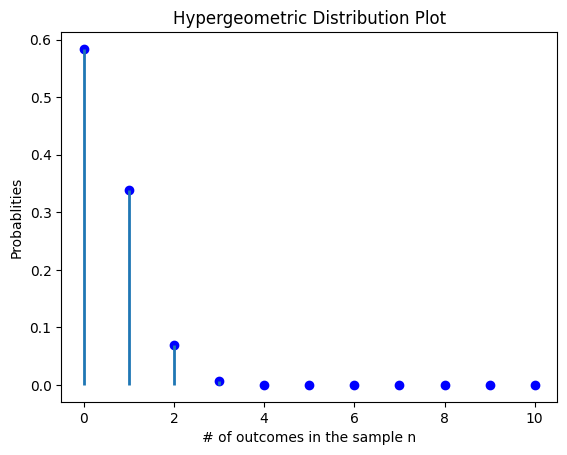

In [ ]:
hypergeom_plot(100, 5, 10)

# **II. Using Scipy for hypergeom functions**

Your Turn: try the following function in scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html


In [4]:
from scipy.stats import hypergeom
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# In Scipy hypogeomtric function  M is N and N is D.
# the order of the function is different from above as well
# populstion M=100 out of which D=5 defects if sample n=10, then
# define a random variable rv as hypogeometric distribution
[M, n, N] = [100, 10, 5]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_defects = rv.pmf(x)
cdf_defects = rv.cdf(x)

In [6]:
# N=100, D=5, n=10 solve P(x=0)=there is no defect
hypergeom(100,10,5).pmf(0)

0.583752366926152

In [ ]:
# pmf cdf tables
for i in range(n+1):
  hgpmf=rv.pmf(i)
  hgcdf=rv.cdf(i)
  format_pmf = "{:.3f}".format(hgpmf)
  format_cdf= "{:.3f}".format(hgcdf)
  print(i, format_pmf, format_cdf)
  #print(i, "   ", hgpmf, "   ", hgcdf)


0 0.584 0.584
1 0.339 0.923
2 0.070 0.993
3 0.006 1.000
4 0.000 1.000
5 0.000 1.000
6 0.000 1.000
7 0.000 1.000
8 0.000 1.000
9 0.000 1.000
10 0.000 1.000


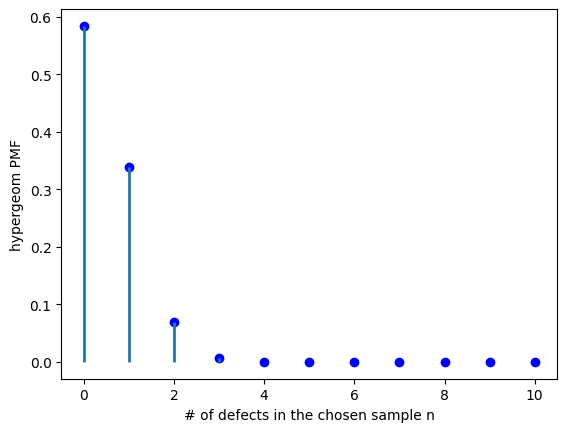

In [ ]:
# pmf plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_defects, 'bo')
ax.vlines(x, 0, pmf_defects, lw=2)
ax.set_xlabel('# of defects in the chosen sample n')
ax.set_ylabel('hypergeom PMF')
plt.show()

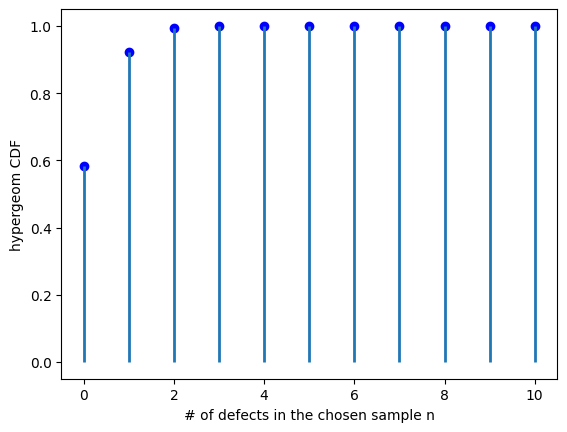

In [ ]:
# cdf plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, cdf_defects, 'bo')
ax.vlines(x, 0, cdf_defects, lw=2)
ax.set_xlabel('# of defects in the chosen sample n')
ax.set_ylabel('hypergeom CDF')
plt.show()

**Ref. You can also use scipy for various discrete distribution function**

Use the scipy functions for other discrete distributions:
Binomial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
Poisson:

In [ ]:
from scipy.stats.morestats import distributions


